In [465]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import datetime
from bs4 import BeautifulSoup
import time
from tqdm import tqdm

In [466]:
pd.options.display.max_columns = None

# Reading datasets

## Eruptions

In [467]:
eruptions=pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-05-12/eruptions.csv")

In [468]:
eruptions.head()

,volcano_number,volcano_name,eruption_number,eruption_category,area_of_activity,vei,start_year,start_month,start_day,evidence_method_dating,end_year,end_month,end_day,latitude,longitude
0,266030,Soputan,22354,Confirmed Eruption,NaN,NaN,2020.0,3.0,23.0,Historical Observations,2020.0,4.0,2.0,1.112,124.737
1,343100,San Miguel,22355,Confirmed Eruption,NaN,NaN,2020.0,2.0,22.0,Historical Observations,2020.0,2.0,22.0,13.434,-88.269
2,233020,"Fournaise, Piton de la",22343,Confirmed Eruption,NaN,NaN,2020.0,2.0,10.0,Historical Observations,2020.0,4.0,6.0,-21.244,55.708
3,345020,Rincon de la Vieja,22346,Confirmed Eruption,NaN,NaN,2020.0,1.0,31.0,Historical Observations,2020.0,4.0,17.0,10.830,-85.324
4,353010,Fernandina,22347,Confirmed Eruption,NaN,NaN,2020.0,1.0,12.0,Historical Observations,2020.0,1.0,12.0,-0.370,-91.550


In [469]:
eruptions.shape

(11178, 15)

In [470]:
eruptions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11178 entries, 0 to 11177
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   volcano_number          11178 non-null  int64  
 1   volcano_name            11178 non-null  object 
 2   eruption_number         11178 non-null  int64  
 3   eruption_category       11178 non-null  object 
 4   area_of_activity        4694 non-null   object 
 5   vei                     8272 non-null   float64
 6   start_year              11177 non-null  float64
 7   start_month             10985 non-null  float64
 8   start_day               10982 non-null  float64
 9   evidence_method_dating  9898 non-null   object 
 10  end_year                4332 non-null   float64
 11  end_month               4329 non-null   float64
 12  end_day                 4326 non-null   float64
 13  latitude                11178 non-null  float64
 14  longitude               11178 non-null

## Volcanoes

In [471]:
volcanoes=pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-05-12/volcano.csv")

In [472]:
volcanoes.head()

,volcano_number,volcano_name,primary_volcano_type,last_eruption_year,country,region,subregion,latitude,longitude,elevation,tectonic_settings,evidence_category,major_rock_1,major_rock_2,major_rock_3,major_rock_4,major_rock_5,minor_rock_1,minor_rock_2,minor_rock_3,minor_rock_4,minor_rock_5,population_within_5_km,population_within_10_km,population_within_30_km,population_within_100_km
0,283001,Abu,Shield(s),-6850,Japan,"Japan, Taiwan, Marianas",Honshu,34.500,131.600,641,Subduction zone / Continental crust (>25 km),Eruption Dated,Andesite / Basaltic Andesite,Basalt / Picro-Basalt,Dacite,,,,,,,,3597,9594,117805,4071152
1,355096,Acamarachi,Stratovolcano,Unknown,Chile,South America,"Northern Chile, Bolivia and Argentina",-23.292,-67.618,6023,Subduction zone / Continental crust (>25 km),Evidence Credible,Dacite,Andesite / Basaltic Andesite,,,,,,,,,0,7,294,9092
2,342080,Acatenango,Stratovolcano(es),1972,Guatemala,México and Central America,Guatemala,14.501,-90.876,3976,Subduction zone / Continental crust (>25 km),Eruption Observed,Andesite / Basaltic Andesite,Dacite,,,,Basalt / Picro-Basalt,,,,,4329,60730,1042836,7634778
3,213004,Acigol-Nevsehir,Caldera,-2080,Turkey,Mediterranean and Western Asia,Turkey,38.537,34.621,1683,Intraplate / Continental crust (>25 km),Eruption Dated,Rhyolite,Dacite,Basalt / Picro-Basalt,Andesite / Basaltic Andesite,,,,,,,127863,127863,218469,2253483
4,321040,Adams,Stratovolcano,950,United States,Canada and Western USA,USA (Washington),46.206,-121.490,3742,Subduction zone / Continental crust (>25 km),Eruption Dated,Andesite / Basaltic Andesite,Basalt / Picro-Basalt,,,,Dacite,,,,,0,70,4019,393303


## Earthquakes

In [473]:
response=requests.get("https://earthquake.usgs.gov/fdsnws/event/1/query?format=geojson&starttime=1929-01-01&endtime=2010-12-31&minmagnitude=2&maxlatitude=-38&minlatitude=-41&minlongitude=-73&maxlongitude=-69")
response

<Response [200]>

In [474]:
villarrica_earthquakes=pd.DataFrame(response.json()['features'])

In [475]:
villarrica_earthquakes.head()

,type,properties,geometry,id
0,Feature,"{'mag': 4.5, 'place': 'Los Lagos, Chile', 'tim...","{'type': 'Point', 'coordinates': [-72.108, -40...",usp000hqxc
1,Feature,"{'mag': 5, 'place': 'Los Lagos, Chile', 'time'...","{'type': 'Point', 'coordinates': [-72.765, -40...",usp000hm6j
2,Feature,"{'mag': 4.7, 'place': 'Araucania, Chile', 'tim...","{'type': 'Point', 'coordinates': [-72.931, -38...",usp000hh3j
3,Feature,"{'mag': 4.6, 'place': 'Los Lagos, Chile', 'tim...","{'type': 'Point', 'coordinates': [-72.108, -40...",usp000hd47
4,Feature,"{'mag': 4.2, 'place': 'Araucania, Chile', 'tim...","{'type': 'Point', 'coordinates': [-72.577, -38...",usp000ha2s


In [476]:
villarrica_earthquakes['url']=villarrica_earthquakes['properties'].apply(lambda x: x['url'])

In [477]:
villarrica_earthquakes['mag']=[x['mag'] for x in villarrica_earthquakes['properties']]

In [478]:
villarrica_earthquakes['longitude']=[x['coordinates'][0] for x in villarrica_earthquakes['geometry']]

In [479]:
villarrica_earthquakes['latitude']=[x['coordinates'][1] for x in villarrica_earthquakes['geometry']]

In [480]:
villarrica_earthquakes['time']=[x['time'] for x in villarrica_earthquakes['properties']]

In [481]:
villarrica_earthquakes['url']

0      https://earthquake.usgs.gov/earthquakes/eventp...
1      https://earthquake.usgs.gov/earthquakes/eventp...
2      https://earthquake.usgs.gov/earthquakes/eventp...
3      https://earthquake.usgs.gov/earthquakes/eventp...
4      https://earthquake.usgs.gov/earthquakes/eventp...
                             ...                        
119    https://earthquake.usgs.gov/earthquakes/eventp...
120    https://earthquake.usgs.gov/earthquakes/eventp...
121    https://earthquake.usgs.gov/earthquakes/eventp...
122    https://earthquake.usgs.gov/earthquakes/eventp...
123    https://earthquake.usgs.gov/earthquakes/eventp...
Name: url, Length: 124, dtype: object

In [483]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
chrome_options = Options()
chrome_options.add_argument('--headless')
driver = webdriver.Chrome()
driver.set_page_load_timeout(30)
driver.get(villarrica_earthquakes['url'][0])
driver.page_source
BeautifulSoup(driver.page_source).find_all('li')[0].text
driver.close()

In [489]:
date=[]
driver = webdriver.Chrome()
for url in tqdm(villarrica_earthquakes['url']):
    driver.get(url)
    time.sleep(10)
    driver.page_source
    date.append(BeautifulSoup(driver.page_source).find_all('ul',attrs={'class':'ng-star-inserted'})[0].text[0:10])
driver.close()

100%|████████████████████████████████████████████████████████████████████████████████| 124/124 [22:57<00:00, 11.11s/it]


In [490]:
date

['2010-12-14',
 '2010-09-26',
 '2010-07-29',
 '2010-05-24',
 '2010-03-28',
 '2010-03-12',
 '2010-03-02',
 '2010-03-01',
 '2010-02-28',
 '2010-02-27',
 '2010-01-15',
 '2009-03-02',
 '2008-09-06',
 '2008-08-17',
 '2008-07-18',
 '2008-02-20',
 '2008-02-16',
 '2007-12-13',
 '2007-11-03',
 '2007-09-17',
 '2007-08-24',
 '2007-08-20',
 '2007-06-01',
 '2007-05-29',
 '2007-05-06',
 '2007-02-17',
 '2006-09-21',
 '2006-07-17',
 '2006-04-23',
 '2006-03-02',
 '2006-02-19',
 '2005-12-31',
 '2004-11-12',
 '2004-08-22',
 '2004-08-21',
 '2004-05-04',
 '2004-04-17',
 '2003-10-27',
 '2003-10-03',
 '2003-08-27',
 '2003-08-23',
 '2003-06-06',
 '2003-05-08',
 '2003-02-13',
 '2002-12-24',
 '2002-12-21',
 '2002-12-18',
 '2002-05-04',
 '2002-04-12',
 '2002-02-09',
 '2001-10-17',
 '2001-01-06',
 '2000-10-24',
 '2000-09-20',
 '2000-04-05',
 '1999-11-15',
 '1999-09-27',
 '1999-04-14',
 '1999-03-27',
 '1999-01-27',
 '1998-12-14',
 '1998-10-16',
 '1998-10-06',
 '1996-03-27',
 '1996-01-01',
 '1995-12-14',
 '1995-09-

In [491]:
villarrica_earthquakes['date']=date

In [493]:
villarrica_earthquakes=villarrica_earthquakes[['id','mag','longitude','latitude','date']]

In [512]:
villarrica_earthquakes['date']=pd.to_datetime(villarrica_earthquakes['date'])

In [513]:
villarrica_earthquakes.head()

,id,mag,longitude,latitude,date
0,usp000hqxc,4.5,-72.108,-40.491,2010-12-14
1,usp000hm6j,5.0,-72.765,-40.459,2010-09-26
2,usp000hh3j,4.7,-72.931,-38.952,2010-07-29
3,usp000hd47,4.6,-72.108,-40.390,2010-05-24
4,usp000ha2s,4.2,-72.577,-38.251,2010-03-28


In [514]:
villarrica_earthquakes.shape

(124, 5)

In [515]:
villarrica_earthquakes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   id         124 non-null    object        
 1   mag        124 non-null    float64       
 2   longitude  124 non-null    float64       
 3   latitude   124 non-null    float64       
 4   date       124 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 5.0+ KB


# Data Exploration and Transformation

## Eruptions

In [516]:
eruptions['volcano_name'].value_counts()

Etna                      241
Fournaise, Piton de la    194
Asosan                    186
Villarrica                164
Asamayama                 147
                         ... 
Mahagnao                    1
Cabalían                    1
Ayelu                       1
Ambitle                     1
Blue Lake Crater            1
Name: volcano_name, Length: 921, dtype: int64

In [517]:
villarrica = eruptions.loc[eruptions['volcano_name']=='Villarrica']
villarrica

,volcano_number,volcano_name,eruption_number,eruption_category,area_of_activity,vei,start_year,start_month,start_day,evidence_method_dating,end_year,end_month,end_day,latitude,longitude
188,357120,Villarrica,20996,Confirmed Eruption,NaN,1.0,2014.0,12.0,2.0,Historical Observations,2020.0,4.0,13.0,-39.42,-71.93
243,357120,Villarrica,20838,Confirmed Eruption,NaN,1.0,2013.0,7.0,25.0,Historical Observations,2013.0,7.0,29.0,-39.42,-71.93
272,357120,Villarrica,20837,Uncertain Eruption,NaN,1.0,2012.0,11.0,14.0,Historical Observations,2012.0,11.0,14.0,-39.42,-71.93
384,357120,Villarrica,12184,Confirmed Eruption,NaN,1.0,2009.0,11.0,22.0,Historical Observations,2012.0,4.0,20.0,-39.42,-71.93
413,357120,Villarrica,12183,Confirmed Eruption,NaN,1.0,2009.0,1.0,29.0,Historical Observations,2009.0,3.0,24.0,-39.42,-71.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9761,357120,Villarrica,12092,Confirmed Eruption,NaN,NaN,-2240.0,0.0,0.0,Radiocarbon (uncorrected),NaN,NaN,NaN,-39.42,-71.93
9950,357120,Villarrica,12091,Confirmed Eruption,NaN,0.0,-2990.0,0.0,0.0,Tephrochronology,NaN,NaN,NaN,-39.42,-71.93
10131,357120,Villarrica,12090,Confirmed Eruption,NaN,NaN,-3730.0,0.0,0.0,Radiocarbon (uncorrected),NaN,NaN,NaN,-39.42,-71.93
10829,357120,Villarrica,12089,Confirmed Eruption,NaN,4.0,-6690.0,0.0,0.0,Radiocarbon (uncorrected),NaN,NaN,NaN,-39.42,-71.93


In [518]:
villarrica.loc[villarrica['start_year']<0]

,volcano_number,volcano_name,eruption_number,eruption_category,area_of_activity,vei,start_year,start_month,start_day,evidence_method_dating,end_year,end_month,end_day,latitude,longitude
9171,357120,Villarrica,12097,Confirmed Eruption,NaN,4.0,-670.0,0.0,0.0,Radiocarbon (uncorrected),NaN,NaN,NaN,-39.42,-71.93
9344,357120,Villarrica,12096,Confirmed Eruption,NaN,NaN,-1080.0,0.0,0.0,Radiocarbon (uncorrected),NaN,NaN,NaN,-39.42,-71.93
9406,357120,Villarrica,21091,Confirmed Eruption,NaN,4.0,-1230.0,NaN,NaN,Radiocarbon (uncorrected),NaN,NaN,NaN,-39.42,-71.93
9603,357120,Villarrica,12095,Confirmed Eruption,NaN,5.0,-1810.0,0.0,0.0,Radiocarbon (uncorrected),NaN,NaN,NaN,-39.42,-71.93
9654,357120,Villarrica,12094,Confirmed Eruption,NaN,0.0,-1980.0,0.0,0.0,Tephrochronology,NaN,NaN,NaN,-39.42,-71.93
9733,357120,Villarrica,12093,Confirmed Eruption,NaN,NaN,-2140.0,0.0,0.0,Radiocarbon (uncorrected),NaN,NaN,NaN,-39.42,-71.93
9761,357120,Villarrica,12092,Confirmed Eruption,NaN,NaN,-2240.0,0.0,0.0,Radiocarbon (uncorrected),NaN,NaN,NaN,-39.42,-71.93
9950,357120,Villarrica,12091,Confirmed Eruption,NaN,0.0,-2990.0,0.0,0.0,Tephrochronology,NaN,NaN,NaN,-39.42,-71.93
10131,357120,Villarrica,12090,Confirmed Eruption,NaN,NaN,-3730.0,0.0,0.0,Radiocarbon (uncorrected),NaN,NaN,NaN,-39.42,-71.93
10829,357120,Villarrica,12089,Confirmed Eruption,NaN,4.0,-6690.0,0.0,0.0,Radiocarbon (uncorrected),NaN,NaN,NaN,-39.42,-71.93


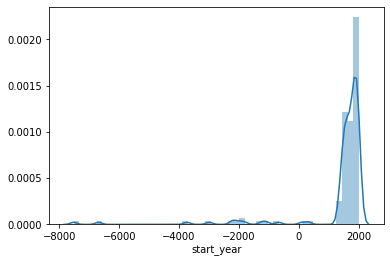

In [519]:
sns.distplot(villarrica['start_year'])

In [520]:
villarrica=villarrica.loc[(villarrica['start_year']>=1929) & (villarrica['start_year']<=2010)]

In [521]:
villarrica.shape

(32, 15)

In [522]:
villarrica=villarrica.loc[~(villarrica['eruption_category']=='Discredited Eruption')]

In [523]:
villarrica['start_day']=villarrica['start_day'].apply(lambda x: x+1 if x==0 else x)

In [524]:
villarrica['start_month']=villarrica['start_month'].apply(lambda x: x+1 if x==0 else x)

In [525]:
villarrica

,volcano_number,volcano_name,eruption_number,eruption_category,area_of_activity,vei,start_year,start_month,start_day,evidence_method_dating,end_year,end_month,end_day,latitude,longitude
384,357120,Villarrica,12184,Confirmed Eruption,NaN,1.0,2009.0,11.0,22.0,Historical Observations,2012.0,4.0,20.0,-39.42,-71.93
413,357120,Villarrica,12183,Confirmed Eruption,NaN,1.0,2009.0,1.0,29.0,Historical Observations,2009.0,3.0,24.0,-39.42,-71.93
430,357120,Villarrica,12182,Confirmed Eruption,NaN,1.0,2008.0,10.0,26.0,Historical Observations,NaN,NaN,NaN,-39.42,-71.93
628,357120,Villarrica,12181,Confirmed Eruption,NaN,1.0,2004.0,8.0,5.0,Historical Observations,2007.0,12.0,24.0,-39.42,-71.93
686,357120,Villarrica,12180,Confirmed Eruption,NaN,1.0,2003.0,5.0,23.0,Historical Observations,2004.0,3.0,25.0,-39.42,-71.93
920,357120,Villarrica,12179,Confirmed Eruption,NaN,1.0,1998.0,2.0,24.0,Historical Observations,2002.0,6.0,16.0,-39.42,-71.93
969,357120,Villarrica,12178,Confirmed Eruption,NaN,1.0,1996.0,9.0,14.0,Historical Observations,1997.0,8.0,16.0,-39.42,-71.93
996,357120,Villarrica,12174,Confirmed Eruption,NaN,1.0,1996.0,1.0,16.0,Historical Observations,NaN,NaN,NaN,-39.42,-71.93
1028,357120,Villarrica,12173,Confirmed Eruption,NaN,1.0,1995.0,4.0,15.0,Historical Observations,1995.0,6.0,2.0,-39.42,-71.93
1048,357120,Villarrica,12172,Confirmed Eruption,NaN,1.0,1994.0,9.0,26.0,Historical Observations,1994.0,12.0,30.0,-39.42,-71.93


In [526]:
villarrica['date']=villarrica['start_day'].astype(int).astype(str)+'/'+villarrica['start_month'].astype(int).astype(str)+'/'+villarrica['start_year'].astype(int).astype(str)

In [527]:
villarrica['date']=pd.to_datetime(villarrica['date'],format="%d/%m/%Y")

In [529]:
villarrica=villarrica[['volcano_number','volcano_name','eruption_number','eruption_category','vei',
                       'start_year','start_month','start_day','latitude','longitude','date']]

In [532]:
villarrica.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 384 to 3429
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   volcano_number     32 non-null     int64         
 1   volcano_name       32 non-null     object        
 2   eruption_number    32 non-null     int64         
 3   eruption_category  32 non-null     object        
 4   vei                31 non-null     float64       
 5   start_year         32 non-null     float64       
 6   start_month        32 non-null     float64       
 7   start_day          32 non-null     float64       
 8   latitude           32 non-null     float64       
 9   longitude          32 non-null     float64       
 10  date               32 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(6), int64(2), object(2)
memory usage: 3.0+ KB


# Exporting data

In [530]:
villarrica.to_csv('./VillarricaEruptions.csv',index=False)

In [531]:
villarrica_earthquakes.to_csv('./VillarricaEarthquakes.csv',index=False)